## Movies.csv file stored in Hadoop

It will be read the dataset "Movies" and uses ML Libraries and some SQL queries

In [60]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [61]:
# sc master - running locally
sc.master

'local[*]'

In [62]:
# Import regex module
import re
from operator import add

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
#pip install pandas

In [65]:
#pip install matplotlib

In [66]:
# spark loading file.
sc = spark.sparkContext

#path
path = "/user3/Movies.csv"
file_path = 'file://///home/hduser/Downloads/Movies.csv'
Movies = spark.read.csv(file_path)
    
Movies.show(5)

+--------------------+--------------------+-----------------+
|                 _c0|                 _c1|              _c2|
+--------------------+--------------------+-----------------+
|Production Budget(M)|Worldwide Gross I...|            Genre|
|                  13|                 230|           action|
|                  16|                 224|            drama|
|                  15|                 221|thriller_suspense|
|                  14|                 202|        adventure|
+--------------------+--------------------+-----------------+
only showing top 5 rows



In [67]:
from pyspark.sql import SparkSession 

In [68]:
Movies = spark.read.csv('file://///home//hduser//Downloads//Movies.csv', inferSchema=True, header=True)
Movies.show()

+--------------------+--------------------------+-----------------+
|Production Budget(M)|Worldwide Gross Income (M)|            Genre|
+--------------------+--------------------------+-----------------+
|                  13|                       230|           action|
|                  16|                       224|            drama|
|                  15|                       221|thriller_suspense|
|                  14|                       202|        adventure|
|                  16|                       198|        adventure|
|                  14|                       180|           action|
|                  18|                       178|           action|
|                  14|                       176|        adventure|
|                  13|                       176|        adventure|
|                  17|                       175|        adventure|
|                  18|                       175|        adventure|
|                  16|                       172

**Print the schema**

In [69]:
#Type of columns
Movies.printSchema()

root
 |-- Production Budget(M): integer (nullable = true)
 |-- Worldwide Gross Income (M): integer (nullable = true)
 |-- Genre: string (nullable = true)



**Check specific columns from the dataframe**

In [70]:
#Check column "Production Budget (M)"
Movies.select('Production Budget(M)').show(5)

+--------------------+
|Production Budget(M)|
+--------------------+
|                  13|
|                  16|
|                  15|
|                  14|
|                  16|
+--------------------+
only showing top 5 rows



In [71]:
Movies.groupby('genre').count().show()

+-----------------+-----+
|            genre|count|
+-----------------+-----+
|           action|   40|
|thriller_suspense|    2|
|          musical|    2|
|        adventure|   53|
|            drama|    2|
|          western|    1|
+-----------------+-----+



## Histograms

In [72]:
#pip install bokeh

In [84]:
Movies_new = {'obs': Movies.select('genre').rdd.flatMap(lambda row: row).collect()}

Text(0.5, 1.0, "Histogram of 'genre' using .hist()")

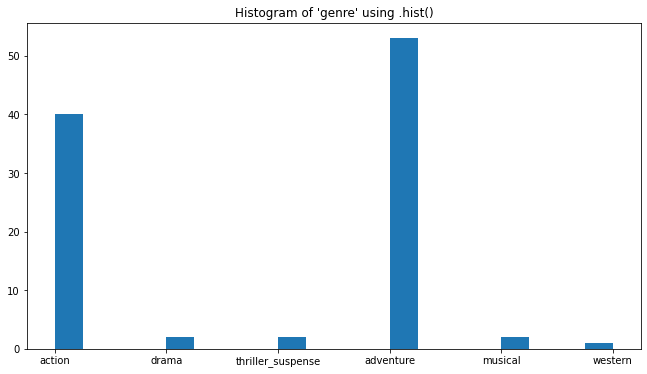

In [85]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(1, 1, 1)

ax.hist(Movies_new['obs'], bins=20)
ax.set_title('Histogram of \'genre\' using .hist()')


#plt.savefig('B05793_05_24.png', dpi=300)

In [89]:
hists = Movies.select('Worldwide Gross Income (M)').rdd.flatMap(lambda row: row).histogram(20)

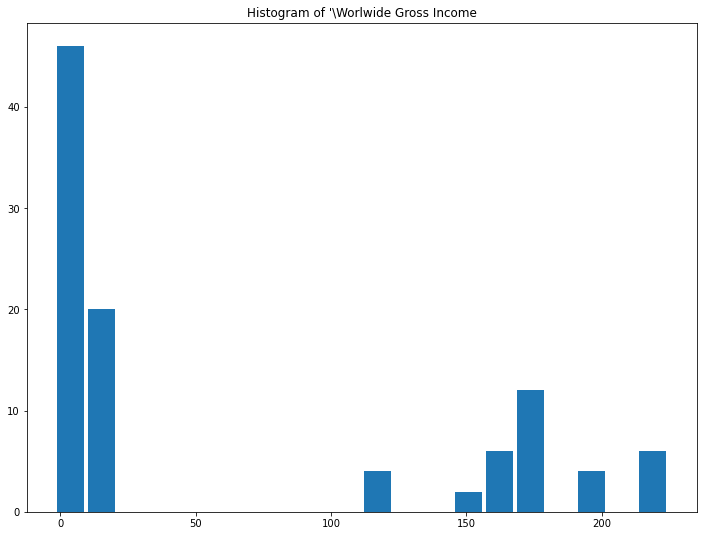

In [102]:
import matplotlib.pyplot as plt
data = {
    'bins': hists[0][:-1],
    'freq': hists[1]
}

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1, 1, 1)
ax.bar(data['bins'], data['freq'], width=10)
ax.set_title('Histogram of \'\Worlwide Gross Income')

plt.savefig('B05793_05_22.png', dpi=5)

**check skewness (we will do it for the `'balance'` feature only)**

In [103]:
Movies.agg({'Worldwide Gross Income (M)': 'skewness'}).show()

+------------------------------------+
|skewness(Worldwide Gross Income (M))|
+------------------------------------+
|                  0.8056594044021581|
+------------------------------------+



In [75]:
import pyspark.sql.types as typ

### Correlations

In [104]:
Movies.corr('Production Budget(M)','Worldwide Gross Income (M)')

-0.3367577715707527

In [106]:
numerical = ['Production Budget(M)','Worldwide Gross Income(M)']

In [108]:
#desc = Movies.describe(numerical)
#desc.show()

In [26]:
import pyspark.sql.types as typ

In [41]:
#pip install bokeh

In [42]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [44]:
fields = [
    *[
        typ.StructField(h[1:-1], typ.IntegerType(), True)
        for h in header.split(',')
    ]
]

schema = typ.StructType(fields)

In [45]:
Movies_df

DataFrame[roduction Budget(M: int, orldwide Gross Income (M: int, enr: int]

In [46]:
Movies_df = spark.createDataFrame(Movies, schema)

In [47]:
Movies_df.printSchema()

root
 |-- roduction Budget(M: integer (nullable = true)
 |-- orldwide Gross Income (M: integer (nullable = true)
 |-- enr: integer (nullable = true)



In [51]:
numerical = ['Production Budget', 'orldwide Gross Income']

In [53]:
#desc = Movies_df.describe(numerical)
#desc.show()

In [36]:
df_outliers = spark.createDataFrame([
        (1, 143.5, 5.3, 28),
        (2, 154.2, 5.5, 45),
        (3, 342.3, 5.1, 99),
        (4, 144.5, 5.5, 33),
        (5, 133.2, 5.4, 54),
        (6, 124.1, 5.1, 21),
        (7, 129.2, 5.3, 42),
    ], ['id', 'weight', 'height', 'age'])

AnalysisException: cannot resolve 'drama' given input columns: [genre]; line 1 pos 8;
'Filter (genre#94 = 'drama)
+- Project [genre#94]
   +- Relation [Production Budget(M)#92,Worldwide Gross Income (M)#93,Genre#94] csv
